In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
len(df)


768

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Replace Zeroes

Zero_Not_Accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in Zero_Not_Accepted:
    df[column] = df[column].replace(0,np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN,mean)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [15]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [21]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns

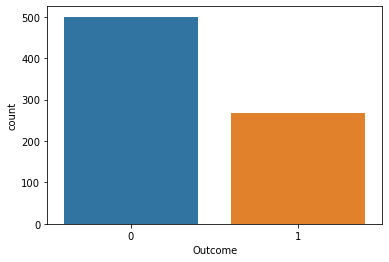

In [22]:
sns.countplot(x='Outcome' , data =df);

In [23]:
#Split dataset train and test dataset
feature_data = df.iloc[:,:-1].values
target_data  = df.iloc[:,-1].values

In [24]:
from sklearn.model_selection import train_test_split
feature_train,feature_test,target_train,target_test = train_test_split(feature_data,target_data,test_size=0.2,random_state = 0)



In [25]:
print(feature_train)
print(feature_test)
print(target_train)
print(target_test)

[[7.00e+00 1.50e+02 7.80e+01 ... 3.52e+01 6.92e-01 5.40e+01]
 [4.00e+00 9.70e+01 6.00e+01 ... 2.82e+01 4.43e-01 2.20e+01]
 [0.00e+00 1.65e+02 9.00e+01 ... 5.23e+01 4.27e-01 2.30e+01]
 ...
 [4.00e+00 9.40e+01 6.50e+01 ... 2.47e+01 1.48e-01 2.10e+01]
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [5.00e+00 1.36e+02 8.20e+01 ... 3.20e+01 6.40e-01 6.90e+01]]
[[1.000e+00 1.990e+02 7.600e+01 ... 4.290e+01 1.394e+00 2.200e+01]
 [2.000e+00 1.070e+02 7.400e+01 ... 3.360e+01 4.040e-01 2.300e+01]
 [4.000e+00 7.600e+01 6.200e+01 ... 3.400e+01 3.910e-01 2.500e+01]
 ...
 [4.000e+00 1.420e+02 8.600e+01 ... 4.400e+01 6.450e-01 2.200e+01]
 [3.000e+00 1.160e+02 7.400e+01 ... 2.630e+01 1.070e-01 2.400e+01]
 [1.000e+00 1.070e+02 7.200e+01 ... 3.080e+01 8.210e-01 2.400e+01]]
[1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0

In [26]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

Sc_data = StandardScaler()
feature_train = Sc_data.fit_transform(feature_train)
feature_test  = Sc_data.fit_transform(feature_test)

In [27]:
#Define the Model
#KNN Machine Learning Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11,p=2,metric='euclidean')
classifier.fit(feature_train,target_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [28]:
#Predict the test set result
target_predict = classifier.predict(feature_test)
target_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [29]:
#Evaluating the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test,target_predict)
cm

array([[95, 12],
       [18, 29]], dtype=int64)

In [30]:
from sklearn.metrics import f1_score
print(f1_score(target_test,target_predict))

0.6590909090909092


In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(target_test,target_predict))

0.8051948051948052


ValueError: Expected 2D array, got 1D array instead:
array=[  8.    183.     64.     29.    155.     23.3     0.672  32.   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

array([1], dtype=int64)

In [78]:
pr2=model.predict(x.loc[3,:].to_numpy().reshape(1,-1))
pr2

array([0], dtype=int64)

In [38]:
#Normalization
x = (df -np.min(df))/(np.max(df)-np.min(df)).values


In [39]:
y = df.Outcome.values
df = df.drop(['Outcome'], axis=1)

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)


In [41]:
# Naive Bayes Machine Learning Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [42]:
#prediction = dict()
prediction = model.predict(x_test)

In [43]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,prediction)

1.0

In [45]:
print(classification_report(y_test, prediction, target_names = ["not_Diabetes", "diabetes"]))

              precision    recall  f1-score   support

not_Diabetes       1.00      1.00      1.00        76
    diabetes       1.00      1.00      1.00        40

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



In [46]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 1.0


In [48]:
#Prediction on single dataset
predicted =model.predict(x.loc[2,:].to_numpy().reshape(1,-1))

In [49]:
predicted

array([1], dtype=int64)

In [50]:
pred = model.predict(x.loc[3,:].to_numpy().reshape(1,-1))

In [51]:
pred

array([0], dtype=int64)